# Look-Elsewhere Effect

In [ ]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Populating the interactive namespace from numpy and matplotlib
Mounted at /content/drive


In [ ]:
# general plot params
params = {
          'axes.labelsize' : 24,
          'xtick.labelsize' : 16,
          'ytick.labelsize' : 16,
          'figure.figsize'  : (14,7),
         }
plt.rcParams.update(params)

The Bayesian evidence for hypothesis $H$, given data $x$ and a model with parameters $z$, is given by

$$p(x| H) = \int dz ~p(x|z,H) p(z|H), $$

where $p(x|z,H)$ is the likelihood and $p(z|H)$ the prior. For a likelihood with a single mode located at $z=\mu$, one can approximate the evidence using the Laplace approximation to give

$$p(x| H) \approx (2 \pi)^{M/2} \sqrt{\det \Sigma} p(x|\mu,H) p(\mu|H) ,$$

where $M$ is the dimensionality of the parameters, and $\Sigma$ is the covariance matrix. If there is no correlation between parameters then the determinant of the covariance matrix is given by the product of the square of the errors of each parameter

$$ \det \Sigma = \prod_{i=1}^M \sigma_i^2 .$$

For simplicity, we assume no correlation in this assignment.

To gain intuition for this equation one can define the prior volume as $V_{\rm prior} = 1/p(\mu|H)$ and the posterior volume as $V_{\rm posterior} = (2 \pi)^{M/2} \sqrt{{\rm det} \Sigma}$. Thus the evidence can be written as

$$p(x| H) \approx p(x|\mu,H) \frac{V_{\rm posterior}}{V_{\rm prior}} .$$


Hence the Bayesian evidence is approximatey equal to the maximum likelihood multiplied by the posterior-to-prior volume ratio. Becuase the posterior volume is typically narrower than the prior, the evidence will be less than the likelihood. The posteriror-to-prior volume ratio acts as a penalty on the likelihood to account for model complexity. In cases where the prior volume is much larger than the posterior volume, a large penalty will be induced.

For a hypothesis test, Bayes factor is used to compare the Bayesian evidence ratio of two hypotheses. Often one is interested in comparing some hypothesis $H$ to a null hypothesis $H_0$. In such a case Bayes factor is defined as

$$ B \equiv \frac{p(x|H)}{p(x|H_0)} \approx \frac{ p(x|\mu,H)}{p(x|H_0)} \frac{V_{\rm posterior}}{V_{\rm prior}},$$

where in the final step we have applied the Laplace approximation. It can be seen that the Bayes factor is equal to the likelihood ratio multiplied by the posteriror-to-prior volume ratio.

In this excercise we will apply Bayesian evidence in the presence of the look-elsewhere effect, which occurs when the prior volume is much larger than the posterior volume. One of the great powers of the Bayesian approach is that it has a built in correction for the look-elsewhere effect and other forms of model complexity thanks to the posterior-to-prior volume ratio.


#### The look-elsewhere effect

A common problem in statistical analysis is to find evidence for
a physical signal
in a large, continuous parameter space, where the true position of the signal is not known a priori.
By searching over a wide
parameter
space one increases the probability of finding large signals caused by random statistical fluctuations, as opposed to a physical source. This is known as the look-elsewhere effect -- or sometimes the "problem of multiple comparisons" in discrete cases --
and must be accounted for when performing a hypothesis test. Ignoring this effect would lead to an overestimation of the statistical significance, sometimes by a considerable amount, and thus incorrectly concluding the detection of a physical signal.

The look-elsewhere effect is prominent throughout particle physics and cosmology.  One of the most commonly known occurrences is in collider searches for new particles, for example it was a key consideration in the Higgs boson discovery.  In this example, one searches a large range of masses for a resonance, without a priori knowledge of the true mass of the particle.  Similarly, in astrophysical searches for particles one seeks resonances in the energy flux of various astrophysical spectra, where the true energy signature of the particle is unknown.  Examples include:  constraining the dark matter self-annihilation cross-section via gamma ray emission from galaxy clusters, searching for WIMPs via charged cosmic rays, searching for non-baryonic dark matter via X-ray emission from the Milky Way, and explaining the source of high energy astrophysical neutrinos.  In terms of cosmology, the look-elsewhere effect occurs in searches for gravitational wave signals from black hole or neutron star mergers.  Here one searches large time series for a signal, where the time and shape of the event are unknown.  A further cosmological example is searching for signatures of inflation in the primordial power spectrum. The look-elsewhere effect is also prevalent in other areas of physics and beyond, for example:  in astronomy it occurs when detecting exoplanets via stellar photometry, where the period and phase of  the  planets’  transits  are  unknown;  in  biology  it  occurs  when  considering  large  DNA sequences to study genetic association; and in medicine it occurs when testing the effectiveness of drugs in clinical trials.

#### Cosmological Inflation Example

We consider a search to find a signal for non-gaussianities in the primordial power spectrum using Planck data. A specific type of such a model adds the following oscillatory perturbation to the $\Lambda$CDM power spectrum,

$$ P(k) = P_0(k) [1 + A \sin(2 \omega k + \phi)], $$

where $P_0(k)$ is the featureless ($\Lambda$CDM) power spectrum and $A$, $\omega$, and $\phi$ are the amplitude, frequency, and phase of the oscillatory perturbation. Specifically we search for a signal with frequency between 0 and 4,000, and phase between 0 and $2 \pi$. We assume the signal is equally likely to apppear anywhere in paramerter space a priori. In this context the null hpothesis $H_0$ corresponds to $A=0$, i.e. no signal, while the alternative hypothesis $H$ corresponds to $A>0$.

In a full analysis one would fit for all 3 parameters, but, for the sake of simplicity, we will assume that the maximization over amplitude and phase has already been performed. We thus focus on $\omega$, which contributes most to the look-elsewhere effect.

First, load the data and plot the likelihood ratio $L/L_0 \equiv { p(x|z,H)}/{p(x|H_0)} $ as a function of frequency $\omega$. Note the likelihood is already evaluated at the best fit value of $A$ and $\phi$.

Text(0, 0.5, '$\\log L/L_0$')

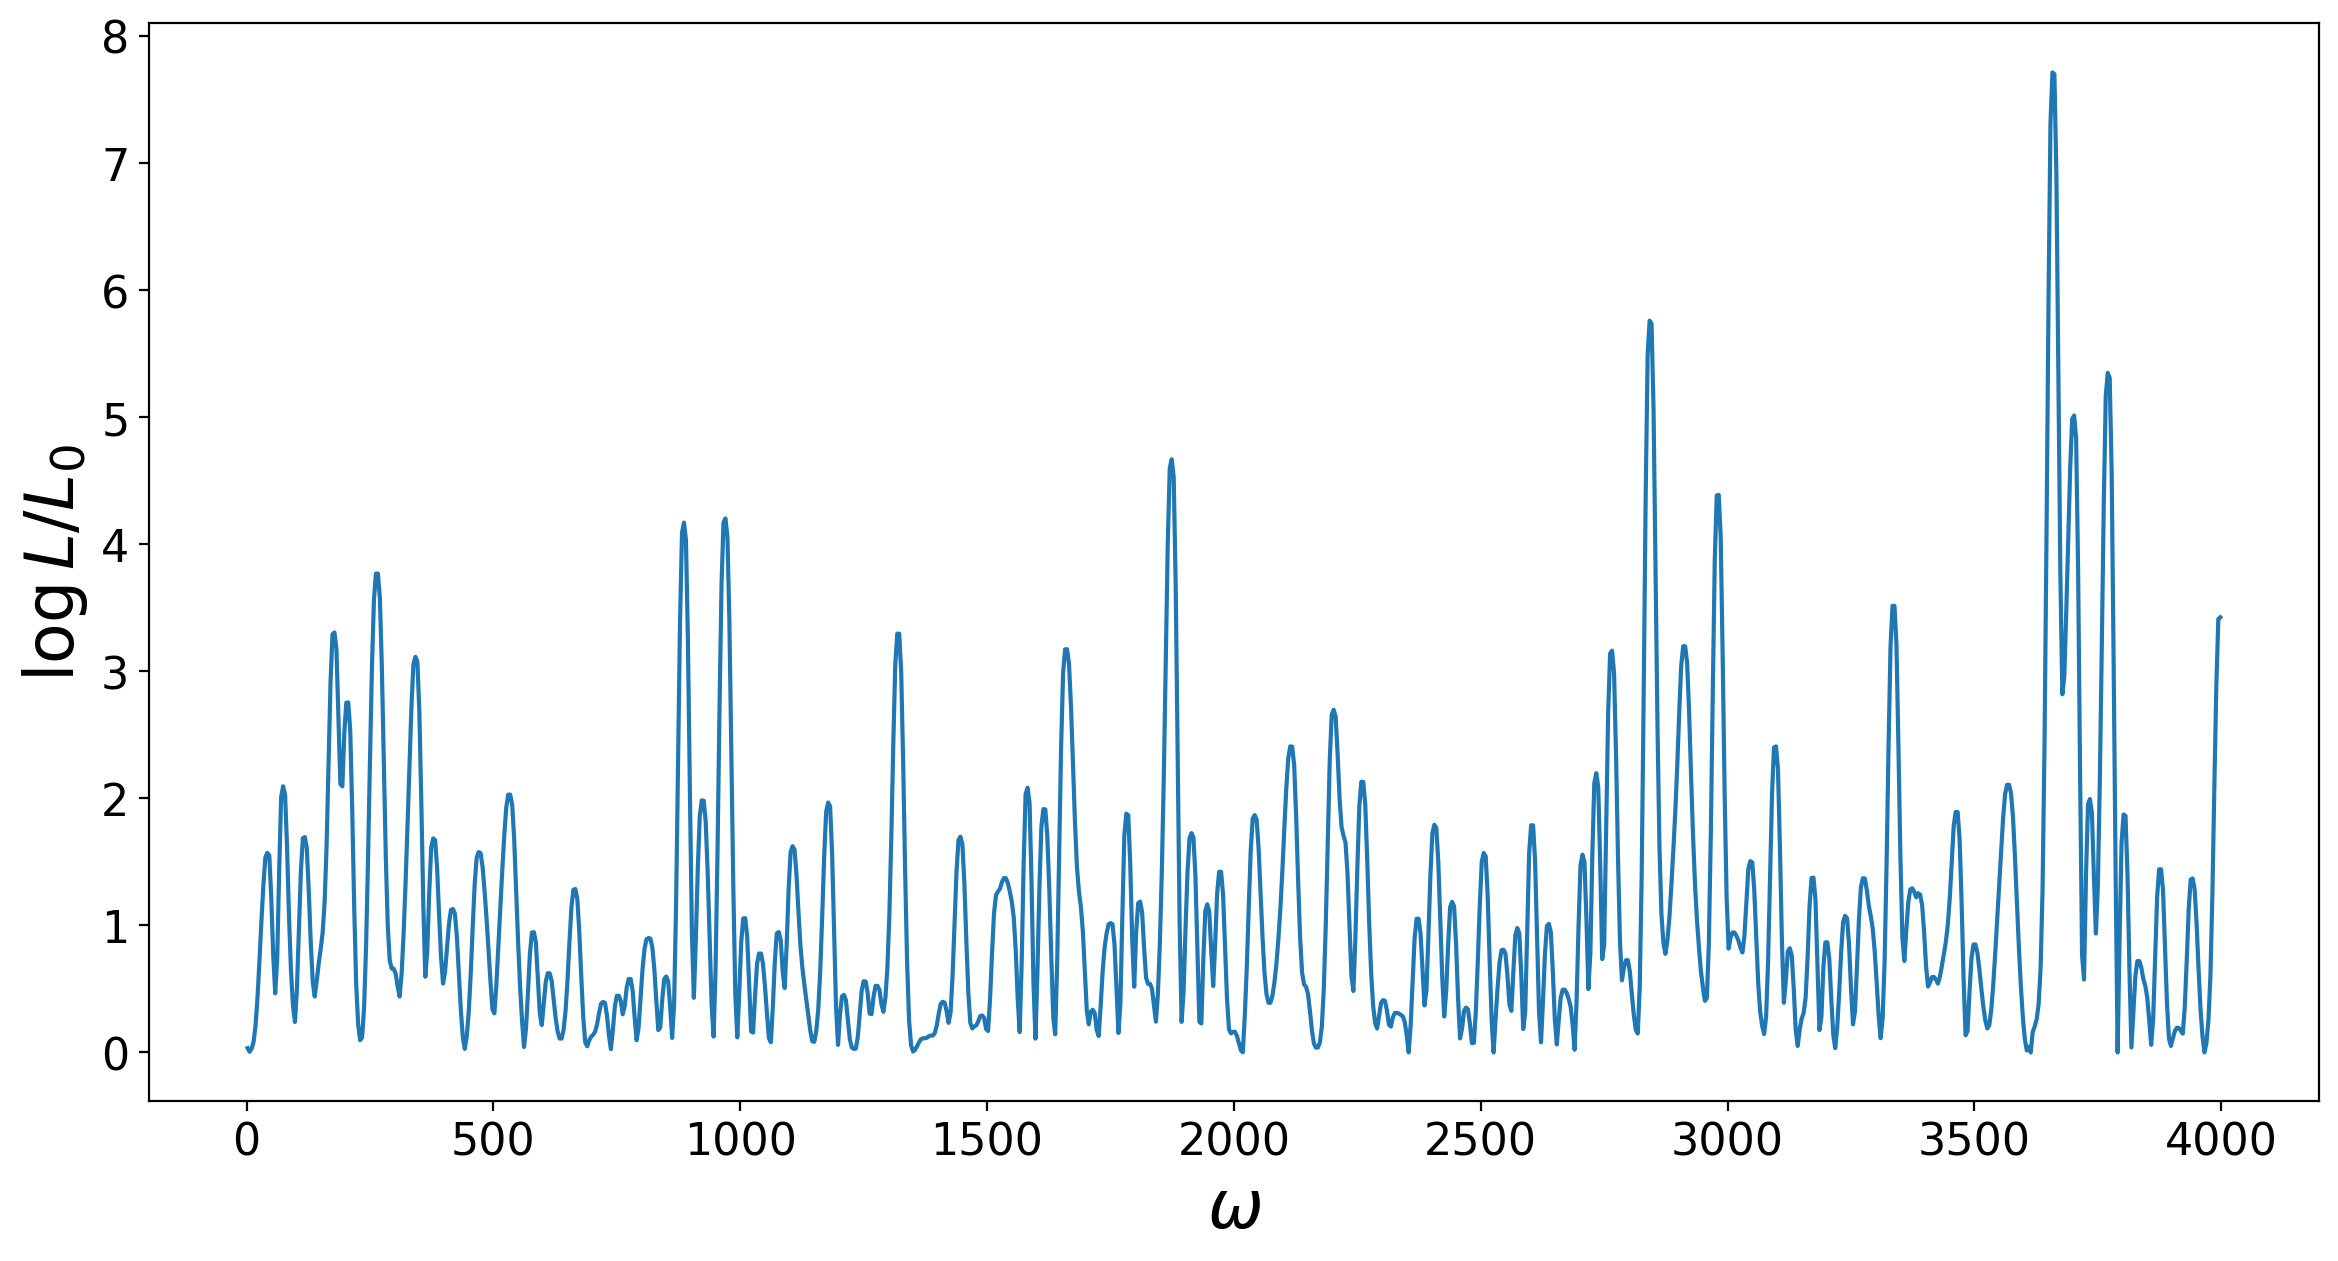

In [ ]:
# load the data
data = dict(np.load("/content/drive/MyDrive/a3net summer 2025/planck13data.npz"))   # !! UPDATE WITH YOUR PATH !!
omega = data['omega']
logL = data['logL']      # logL evaluated at omega
logL0 = data['logL0']

# compute log L/L0
LL = logL - logL0

# plot the data
plt.figure()
plt.plot(omega, LL)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\log L/L_0$')

Because the search for a signal considers any frequency between 0 and 4,000, the prior volume for the frequency is very large. This leads to the likelihood  being multimodal,  with  many (potentially all) of the peaks corresponding to  noise  fluctuations  rather  than a physical  source. This is the look-elsewhere effect: by considering a large prior volume one invites the possibility of finding many large peaks which are just statistical fluctuations.

We see the maximum likelihood occurs at around $\omega=3660$. Naively, one might compute the root chi-squared at this peak to determine the significance. We will start by doing this.

Approximating peaks as gaussians, the chi-squared is equal to $2 \log L /L_0$. The provided likelihood is discretely sampled over $\omega$, so to estimate the height, width, and location of the peak in frequency space a simple approach is to find the datapoint with maximum likelihood and fit a gaussian through it and adjacent data points. (As mentioned earlier, a more careful analysis would directly optimize and compute the covariance matrix of the likelihood in the space of all 3 parameters $A, \omega, {\rm and } \, \phi$.)

<span style="color:blue"> <i> 1. By applying a gaussian fit, or otherwise, find the location of the maximum, i.e. the best fit $\omega$, the value of $\log L/ L_0$ at the maximum, and the error  $\sigma_\omega$. Make a plot of the Gaussian fit and the data around the peak.
</i></span>

Hint: Fit the gaussian to the likelihood ratio, not the log likelihood ratio.

In [ ]:
# locate maximum likelihood and surrounding data points
max_index = np.argmax(LL)

LL_max = LL[max_index]
omega_max = omega[max_index]

LL_peak = LL[max_index-2:max_index+4]
omega_peak = omega[max_index-2:max_index+4]

In [ ]:
# fit the gaussian
...

In [ ]:
# plot the fit over the data
...

In [ ]:
LL_fit = np.log(popt[0])    # the maximum log L/L0
omega_fit = popt[1]
sigma_omega = np.abs(popt[2])

LL_fit, omega_fit, sigma_omega

<span style="color:blue"> <i> 2. Compute the root chi-squared of the maximum peak, assuming it is a Gaussian. This gives the naive significance of the sigal without considering the look-elsewhere effect.
</i></span>

In [ ]:
...

You should find the root chi-squared, to be around 4. This, naively, means that a detection at the level of 4 sigma has been made. While physicists typically set the level to announce a detection at 5 sigma, 4 sigma is still  quite a significant result and would likely attract some media attention. However, the root chi-squared, and more fundamentally the likelihood ratio, does not take into account the look-elsewhere effect. Because a large prior volume introcudes many spurious peaks due to statistical fluctuations, the significance must be penalized. As discussed above, Bayes factor does this for free.

<span style="color:blue"> <i> 3. Compute Bayes factor:
</i></span>    
$$ B \equiv \frac{p(x|H)}{p(x|H_0)} \approx \frac{ p(x|\mu,H)}{p(x|H_0)} \frac{V_{\rm posterior}}{V_{\rm prior}},$$
where the prior volume and the posterior volume are defined as $V_{\rm prior} = 1/p(\mu|H)$ and $V_{\rm posterior} = (2 \pi)^{M/2} \sqrt{{\rm det} \Sigma}$.

Note:
The Bayes factor should technically be computed by adding the contributions of all peaks, as the evidence is an integral over parameter space. However, because the maximum likelihood peak here is much higher than the others, it suffices to only consider the contribution to the Bayes factor from the maximum
mode.

Hint:
Use all 3 likelihood parameters, $A, \omega, \phi$. We provide the errors on $A$ and $\phi$ for the maximum peak, as well as the prior volume on the amplitude in the cell below.

In [ ]:
# given amplitude and phase information
sigma_A = 0.03901713
Vprior_A = 0.153240657

sigma_phi = 0.46561369

In [ ]:
...

4. Interpret what you find.

#### References / Extra Reading
There are also frequentist approaches to deal with the look-elsewhere effect -- see   [Fergusson et al. (2015)](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.91.123506) for such an analysis for the problem considered above. However, the Bayesian approach provides a more general framework as discussed in [Bayer & Seljak (2020)](https://iopscience.iop.org/article/10.1088/1475-7516/2020/10/009).

***